In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Polygon
from shapely.geometry import Point
from shapely.geometry import LineString

In [3]:
def load_file(path):
    load=np.loadtxt(path)
    data=load[:,:-1]
    target=load[:,-1]
    target=target.reshape(-1,1)
    return data,target

In [4]:
def car_move(x,y,car_degree,wheel_degree):
    car_radians=math.radians(car_degree)
    wheel_radians=math.radians(wheel_degree)
    
    x=x+math.cos(wheel_radians+car_radians)+math.sin(wheel_radians)*math.sin(car_radians)
    y=y+math.sin(wheel_radians+car_radians)-math.sin(wheel_radians)*math.cos(car_radians)
    car_radians=car_radians-math.asin(math.sin(wheel_radians)/3)
    car_degree=math.degrees(car_radians)
    x=round(x,4)
    y=round(y,4)
    return x,y,car_degree

In [5]:
#定義活化函數sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def criterion(data,target,ih_weight,ho_weight):
    y1=sigmoid(np.dot(data, ih_weight[1:,:])-ih_weight[0,:])
    y2=sigmoid(np.dot(y1,ho_weight[1:,:])-ho_weight[0,:])
    loss=(target-y2)**2
    loss=loss.sum()/len(target)
    return loss

In [7]:
def run_epoch(train_data, target,epoch):
    # 三個權值，隨機
    np.random.seed(0)
    learing_rate=0.1
    input_size=len(train_data[0])
    output_size=len(target[0])
    hidden_size=20
    i_h_weight_key = np.random.uniform(-1, 1, size=(input_size+1,hidden_size))
    h_o_weight_key = np.random.uniform(-1, 1, size=(hidden_size+1,output_size))
    loss=[]
    for i in range(epoch):
        for number in range(len(train_data)):
            #正向
            y = sigmoid(np.dot(train_data[number].reshape(1,input_size), i_h_weight_key[1:,:])-i_h_weight_key[0,:])  # 做內積和扣掉神經閥值            
            o = sigmoid(np.dot(y, h_o_weight_key[1:,:])-h_o_weight_key[0,:])  # 做內積和扣掉神經閥值
            #反向
            delta_output=(target[number]-o)*o*(1-o)
            delta_hidden=y*(1-y)*np.dot(delta_output,h_o_weight_key[1:,:].T)
            
            #更改權重值
            i_h_weight_key[0]=i_h_weight_key[0]-learing_rate*delta_hidden#更改bias
            i_h_weight_key[1:,:]=i_h_weight_key[1:,:]+learing_rate*np.dot(train_data[number].reshape(input_size,1),delta_hidden)

            h_o_weight_key[0]=h_o_weight_key[0]-learing_rate*delta_output#更改bias
            h_o_weight_key[1:,:]=h_o_weight_key[1:,:]+learing_rate*np.dot(y.reshape(hidden_size,1),delta_output)
         
        c_loss=criterion(train_data,target,i_h_weight_key,h_o_weight_key)
        loss.append(c_loss)    
        if((i+1)%10==0):
            print(f"{i+1} times,loss= {c_loss: .4f}")
    
    return i_h_weight_key,h_o_weight_key,loss

In [8]:
def sentive_distance(x,y,car_degree):
    position=np.loadtxt("軌道座標點.txt",delimiter=',',skiprows=1)
    position=position[2:]
    radians=np.radians(car_degree)
    l_x=100*math.cos(radians)+x
    l_y=100*math.sin(radians)+y
    start=[x,y]
    end=[l_x,l_y]
    distances=[]
    input_path=LineString([start,end])
    for i in range(len(position)):
        segment=(position[i],position[(i+1)%len(position)])
        segment_path = LineString(segment)
        
        if input_path.intersects(segment_path):
            start=Point(start)
            inter_points = input_path.intersection(segment_path)
            distance=inter_points.distance(start)
            distances.append(distance)
            

    return round(min(distances),4)
            

In [9]:
def caulate_wheel(merge):
    y = sigmoid(np.dot(merge.reshape(1,3), i_h_weight_key[1:,:])-i_h_weight_key[0,:])  # 做內積和扣掉神經閥值            
    o = sigmoid(np.dot(y, h_o_weight_key[1:,:])-h_o_weight_key[0,:])  # 做內積和扣掉神經閥值
    wheel_degree=o*(target_max-target_min)+target_min
    
    return wheel_degree

In [10]:
data,target=load_file("train4dAll.txt")
global target_min,target_max,i_h_weight_key,h_o_weight_key
epoch=1000
data_max=np.max(data,axis=0)
data_min=np.min(data,axis=0)
data=(data-data_min)/(data_max-data_min)
target_max=np.max(target,axis=0)
target_min=np.min(target,axis=0)
target_std=(target-target_min)/(target_max-target_min)

i_h_weight_key,h_o_weight_key,loss=run_epoch(data, target_std,epoch)

10 times,loss=  0.0257
20 times,loss=  0.0257
30 times,loss=  0.0256
40 times,loss=  0.0256
50 times,loss=  0.0255
60 times,loss=  0.0254
70 times,loss=  0.0254
80 times,loss=  0.0253
90 times,loss=  0.0252
100 times,loss=  0.0252
110 times,loss=  0.0251
120 times,loss=  0.0251
130 times,loss=  0.0250
140 times,loss=  0.0250
150 times,loss=  0.0249
160 times,loss=  0.0249
170 times,loss=  0.0249
180 times,loss=  0.0248
190 times,loss=  0.0248
200 times,loss=  0.0248
210 times,loss=  0.0248
220 times,loss=  0.0247
230 times,loss=  0.0247
240 times,loss=  0.0247
250 times,loss=  0.0247
260 times,loss=  0.0247
270 times,loss=  0.0246
280 times,loss=  0.0246
290 times,loss=  0.0246
300 times,loss=  0.0246
310 times,loss=  0.0246
320 times,loss=  0.0246
330 times,loss=  0.0246
340 times,loss=  0.0246
350 times,loss=  0.0245
360 times,loss=  0.0245
370 times,loss=  0.0245
380 times,loss=  0.0245
390 times,loss=  0.0245
400 times,loss=  0.0245
410 times,loss=  0.0245
420 times,loss=  0.0245
4

C:\Users\User\AppData\Local\Temp\ipykernel_11552\1508754856.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wheel_radians=math.radians(wheel_degree)


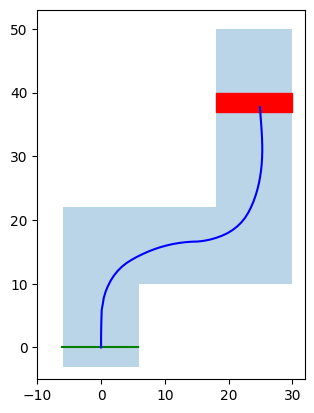

In [11]:
x=0
y=0
car_degree=90
position_x=[x]
position_y=[y]
#可能sigmoid值是0到1，要轉換
while True:
    direct=sentive_distance(x,y,car_degree)
    left=sentive_distance(x,y,car_degree-45)
    right=sentive_distance(x,y,car_degree+45)
    merge=np.hstack((direct,right,left))
    #print(merge)
    merge=(merge-data_min)/(data_max-data_min)
    wheel_degree=caulate_wheel(merge)
    #print(f"x:{x} y:{y} car_degree:{car_degree} wheel_degree:{wheel_degree}")
    x,y,car_degree=car_move(x,y,car_degree,-wheel_degree)
    position_x.append(x)
    position_y.append(y)
    if 40-y<=3:
        break

position=np.loadtxt("軌道座標點.txt",delimiter=',',skiprows=1)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

polygon1 = Polygon(position[2:], closed=True, fill=True,alpha=0.3) #地圖
ax.add_patch(polygon1)

vertices2 = [[18, 37], [18, 40], [30, 40], [30, 37]] #終點
polygon2 = Polygon(vertices2, closed=True, fill=True,color='red')
ax.add_patch(polygon2)

ax.axhline(y=0,color='green',xmin=3/32, xmax=12/32)#起點
             
ax.set_xlim((-10, 32))
ax.set_ylim((-5, 53))

ax.plot(position_x, position_y, color='blue')
plt.show()